In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import matplotlib.lines as lns

In [3]:
def plot_function(interval,fun):
    a=interval[0]
    b=interval[1]
    
    x=np.linspace(a-3,b+3,100)
    y1=fun(x)
    
    plt.figure(figsize=(15, 10))
    plt.plot(x,y1)
    plt.plot(x,np.zeros(x.size))
    
def draw_point(p,itr,mark,txt):
    plt.plot(p[0],p[1],mark,linewidth=10)
    plt.text(p[0],p[1],txt+str(itr),fontsize = 16)
    
def plot_function_with_points(interval,fun):
    plot_function(interval,fun)
    
    a=interval[0]
    b=interval[1]
    
    draw_point([a,0],0,'bo',"a")
    draw_point([b,0],0,'bo',"b")
    draw_point([a,fun(a)],0,'bo',"f(a)")
    draw_point([b,fun(b)],0,'bo',"f(b)")

# Rešavanje nelinearnih jednačina

#### Tema današnjeg predavanja su numeričke metode za rešavanje jednačina kod kojih zavisnost između promenjljivih nije linearna.
#### Jedan primer nelinearne jednačine je kvadratna jednačina:
### $$ax^2+bx+c=0$$
#### Kvadratna jednačina ima analitičko rešenje:
### $$x=\frac{-b\pm \sqrt{b^2-4ac}}{2a}.$$
#### Međutim, postoji veliki broj nelinearnih jednačina u realnim problemima (recimo detekcija kolizija) koje nemaju analitičko rešenje. U tom slučaju koristimo numeričke metode.

## Uvodna napomena:

#### Na ovom predavanju rešavanje nelinearne jednačine posmatraćemo kao određivanje nule funkcije, odnosno određivanje tačke $x$ za koju važi $f(x)=0$.
#### Na primer, tačka x za koju važi $cos(x)=x$ je ista tačka $x$ za koju važi $cos(x)-x=0$.

## Numeričke metode za rešavanje nelinearnih jednačina

#### Postoji dve vrste metoda:
#### 1. **Zatvorene**, kod kojih moramo znamo zatvoreni interval da bi mogli da upotrebimo metodu.
#### 2. **Otvorene**, kod koji metod možemo da upotrebimo sa proizvoljnim početnim rešenjem.

## Metoda polovljenja

#### Najednostavnija metoda. Spada u zatorene metode, odnosno moramo da znamo neki početni interval $[a,b]$ u kome se nalazi rešenje.
#### Da bi mogli da koristimo metodu polovljenja, na intervalu $[a,b]$ funkcija $f(x)$ čiju nulu tražimo mora da bude neprekidna i da seče $x$-osu bar u jednoj tački (da ima nulu na tom zatvorenom intervalu).

#### Na primer, fukcija $cos(x)-x$ ima jednu nulu na intervalu $[-2,2]$

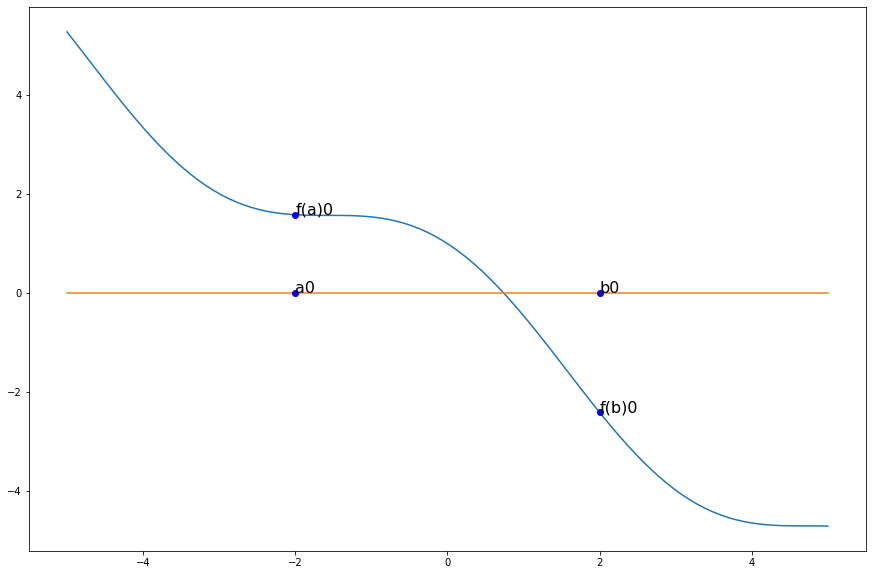

In [4]:
plot_function_with_points([-2,2],lambda x: np.cos(x)-x)

### Algoritam metode polovljenja
#### 1. Proveravamo da li važi $f(a)f(b)<0$, ako ne važi ovde završavamo algoritam
#### Ponavljamo
#### &nbsp;&nbsp;&nbsp;&nbsp;2. Odredimo polovinu interavala $[a,b]$:$$c=\frac{a+b}{2}$$
#### &nbsp;&nbsp;&nbsp;&nbsp;3. Proveravamo da li važi $f(c)=0$, ako važi pronašli smo rešenje i ovde završavamo algoritam.
#### &nbsp;&nbsp;&nbsp;&nbsp;4. Proveravamo u kom intervalu od dva ponuđena $[a,c]$ i $[c,b]$ funkcija menja znak, na primer proverimo da li važi:
#### &nbsp;&nbsp;&nbsp;&nbsp;$$f(a)f(c)<0$$.
#### &nbsp;&nbsp;&nbsp;&nbsp;5. Nastavljamo da delimo interval u kome funkcija menja znak, odnosno radimo jedno od $a=c$ ili $b=c$.
#### Kraj ponavljanja
#### 6. Vraćamo $c$ kao rešenje

#### Primer: Rešavamo jedančinu $x+3=0$ na intervalu $[-4,0]$. Rešenje je $x=-3$.
#### Očigledno je da je $x+3=0$ linearna jednačina, ali je namerno odbrana za lakšu ilustraciju metode.

#### Provera početnog uslova

In [6]:
a=-4
b=0
f=lambda x: x+3
fa=f(a)
fb=f(b)
print(fa)
print(fb)
fa*fb<0

-1
3


True

#### Iteracija 1.

In [7]:
c=(a+b)/2
fc=f(c)
fc==0

False

In [8]:
fa*fc<0

True

In [9]:
b=c

#### Iteracija 2.

In [11]:
fa=f(a)
fb=f(b)
c=(a+b)/2
fc=f(c)
print(c)
print(f(c))
fc==0

-3.0
0.0


True

#### Pogledaćemo prvo vizualizaciju metode polovljenja pre nego što krenemo na pisanje koda.

In [12]:
def polovljenje_viz(a,b,maxIter,tacnost,funkcija):
    plot_function([a,b],funkcija)
    c=a
    if funkcija(a)*funkcija(b) < 0:
        for i in range(1,maxIter+1):
            draw_point([a,0],i,'bo',"a")
            draw_point([b,0],i,'bo',"b")
            draw_point([a,funkcija(a)],i,'bo',"f(a)")
            draw_point([b,funkcija(b)],i,'bo',"f(b)")
            
            c=(a+b)/2
            fc=funkcija(c)
            
            draw_point([c,0],i,'r*',"c")
            
            if(fc==0 or np.abs(b-a)<tacnost):
                break
            else:
                if funkcija(c)*funkcija(a) < 0:
                    b=c
                else:
                    a=c
            draw_point([c,fc],i,'r*',"f(c)")
        return c
    return 'greska'

-2.0


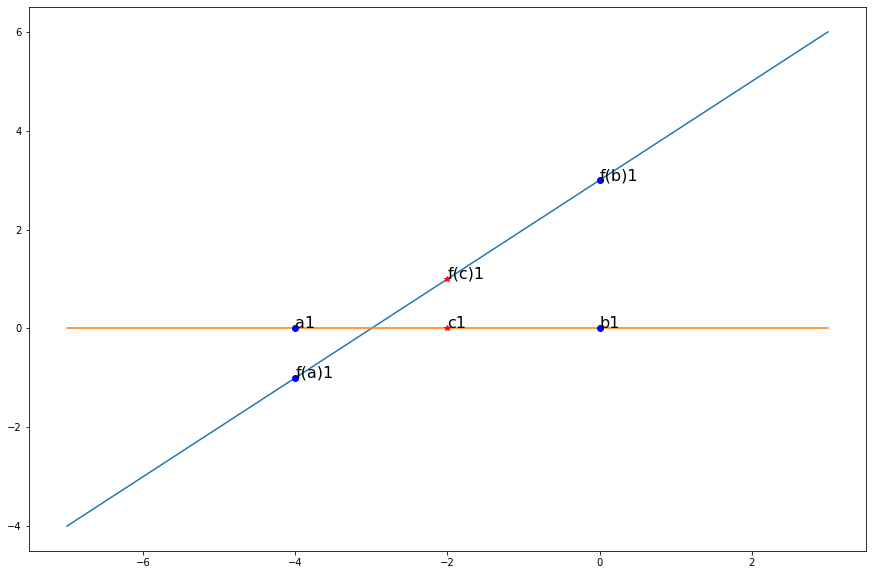

In [13]:
x = polovljenje_viz(-4,0,1,10**-5,lambda x: x+3)
print(x)

#### Metodu ćemo sada ilustrovati na primer jedančine $cos(x)-x$ na intervalu $[−15,5]$.

-5.0


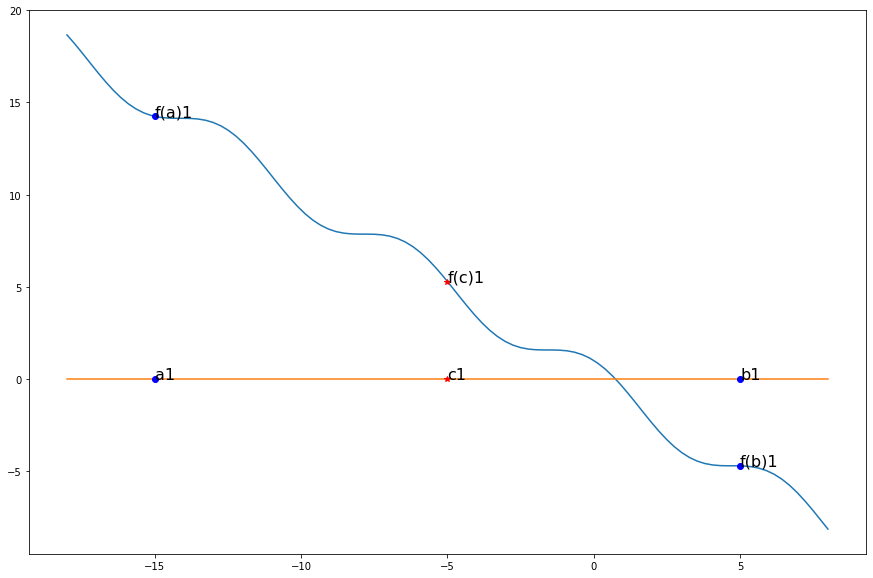

In [14]:
x = polovljenje_viz(-15,5,1,10**-5,lambda x: np.cos(x)-x)
print(x)

#### Pogledati animaciju za metodu polovljenja sa slajdova.

#### Pišemo kod za metodu polovljenja.
#### Spajamo kod koji smo gore pisali za primer $x+3$ u jednu celinu:

In [49]:
def polovljenje(a,b,maxIter,tacnost,funkcija):
    print("iter\ta\t\tb\t\tc\t\t|b-a|")
    c=a
    if funkcija(a)*funkcija(b) < 0:
        for i in range(1,maxIter+1):
            c=(a+b)/2
            fc=funkcija(c)
            
            tmp_str = "%.1f \t %.8f \t %.8f \t %.8f \t %.8f" % (i,a,b,c,np.abs(b-a))
            print(tmp_str)
            
            if(fc==0 or np.abs(b-a)<tacnost):
                break
            else:
                if funkcija(c)*funkcija(a) < 0:
                    b=c
                else:
                    a=c
        return c
    return 'greska'

In [50]:
x = polovljenje(-15,5,30,10**-5,lambda x: np.cos(x)-x)
print(x)

iter	a		b		c		|b-a|
1.0 	 -15.00000000 	 5.00000000 	 -5.00000000 	 20.00000000
2.0 	 -5.00000000 	 5.00000000 	 0.00000000 	 10.00000000
3.0 	 0.00000000 	 5.00000000 	 2.50000000 	 5.00000000
4.0 	 0.00000000 	 2.50000000 	 1.25000000 	 2.50000000
5.0 	 0.00000000 	 1.25000000 	 0.62500000 	 1.25000000
6.0 	 0.62500000 	 1.25000000 	 0.93750000 	 0.62500000
7.0 	 0.62500000 	 0.93750000 	 0.78125000 	 0.31250000
8.0 	 0.62500000 	 0.78125000 	 0.70312500 	 0.15625000
9.0 	 0.70312500 	 0.78125000 	 0.74218750 	 0.07812500
10.0 	 0.70312500 	 0.74218750 	 0.72265625 	 0.03906250
11.0 	 0.72265625 	 0.74218750 	 0.73242188 	 0.01953125
12.0 	 0.73242188 	 0.74218750 	 0.73730469 	 0.00976562
13.0 	 0.73730469 	 0.74218750 	 0.73974609 	 0.00488281
14.0 	 0.73730469 	 0.73974609 	 0.73852539 	 0.00244141
15.0 	 0.73852539 	 0.73974609 	 0.73913574 	 0.00122070
16.0 	 0.73852539 	 0.73913574 	 0.73883057 	 0.00061035
17.0 	 0.73883057 	 0.73913574 	 0.73898315 	 0.00030518
18.0 	 0.73898

In [51]:
x = polovljenje(-4,0,10,10**-5,lambda x: x+3)
print(x)

iter	a		b		c		|b-a|
1.0 	 -4.00000000 	 0.00000000 	 -2.00000000 	 4.00000000
2.0 	 -4.00000000 	 -2.00000000 	 -3.00000000 	 2.00000000
-3.0


### Konvergencija metode polovljenja

#### Metoda polovljenja ima garantovanu konvergenciju jer počinje od zatvorenog intervala koji sadrži rešenje, a metod tako funkcioniše da će sigurno stići do rešenja ili toliko malog intervala da ga nema smisla više poloviti.

### Brzina konvergencije

#### Brzina konvergencije meri kojom brzinom opada greška (rastojanje između trenutnog i tačnog rešenja) kroz iteracije metoda.
#### Brzina se izražava kao oblik funkcije kojoj približno odogvara opadanje greške kroz iteracije.
#### Na primer, ako opadanje greške prati skoro pravu liniju kažemo da metoda konvergira linearno.
#### Ako prati funkciju $f(x)=x^2$ kažemo da konvergira kvadratno itd. Očigledno je da je kvadratna konvergencija bolja od linearne itd.

In [19]:
def polovljenje_konvergencija(a,b,maxIter,tacnost,funkcija,ax):
    c=a
    greske=[]
    if funkcija(a)*funkcija(b) < 0:
        for i in range(1,maxIter+1):
            c=(a+b)/2
            fc=funkcija(c)
            
            #tmp_str = "%.8f \t %.8f \t %.8f" % (a,b,c)
            #print(tmp_str)
            
            if(fc==0 or np.abs(b-a)<tacnost):
                break
            else:
                if funkcija(c)*funkcija(a) < 0:
                    b=c
                else:
                    a=c
            greske.append(np.abs(a-b))
        if ax is None:
            fig, ax = plt.subplots(figsize=(15, 10))
        ax.plot(np.arange(1,len(greske)+1),np.log10(greske),linewidth= 2)
        ax.set_xlabel("Iteracije")
        ax.set_ylabel("Greska")
    return ax

#### Prikazaćemo na koji način opada veličina intervala $[a,b]$ što se može grubo može smatrati greškom za primer jednačine $cos(x)-x$

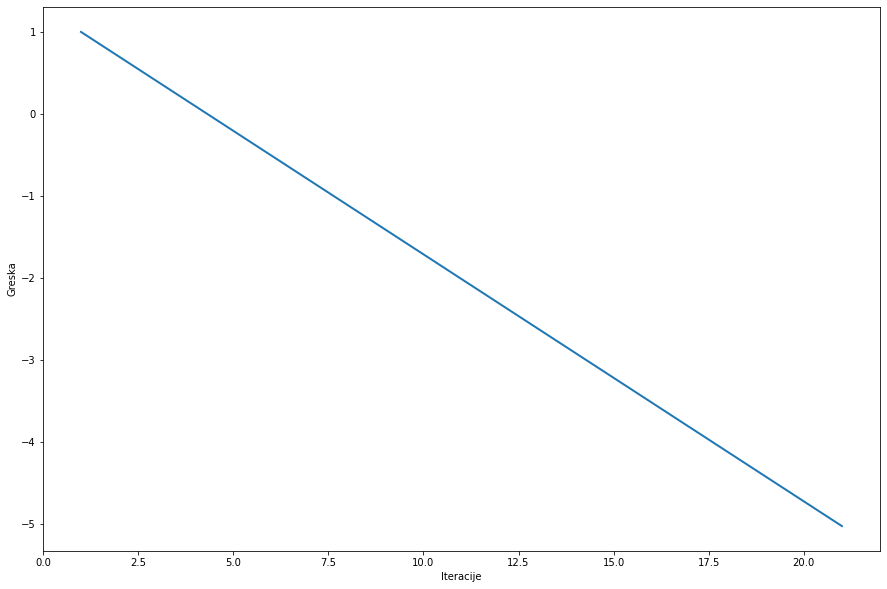

In [20]:
x=polovljenje_konvergencija(-15,5,100,10**-5,lambda x: np.cos(x)-x,None)

#### Vidimo da greška opada kao prava linija što ilustruje da je konvergencija metode polovljenja linearna.

## Metoda sečice

#### Mana metode polovljenja to što ne koristi vrednosti već samo znak funkcije $f(x)$ u svom algoritmu.
#### Metoda sečice koristi funkciju vrednosti funkcije $f(x)$.
#### Ideja je da prilikom traženja nule $f(x)$ zamenimo pravom na malom intervalu (linearna interpolacija).
#### Umesto da tražimo nulu $f(x)$ koja može biti komplikovanog oblika, tražimo nulu prave koja je jednostavna.

### Algoritam metode sečice

#### Imamo dve tačke $x_1$ i $x_2$ i funkciju $f(x)$ čiju nulu određujuemo. 
#### Cilj nam je da pronađemo tačku gde prava između tačaka  $(x_1,f(x_1))$ i $(x_2,f(x_2))$ seče x-osu.
#### Ako imamo pravu $y=kx+n$ ona tačku u kojoj seče x-osu možemo odrediti na sledeći način:
### $$y=kx+n\\y=0\\0=kx+n\\x=-\frac{n}{k}$$
#### Određujemo sada jednačinu prave $y=kx+n$ kroz tačke  $(x_1,f(x_1))$ i $(x_2,f(x_2))$:
### $$f(x_1)=kx_1+n\\f(x_2)=kx_2+n$$
#### Oduzimamo drugu od prve jednačine:
### $$f(x_1)-f(x_2)=k(x_1-x_2)$$
#### Određujemo $k$:
### $$k=\frac{f(x_1)-f(x_2)}{x_1-x_2}$$
#### Određujemo $n$ zamenom $k$ u prvu jednačinu:
### $$f(x_1)=\frac{f(x_1)-f(x_2)}{x_1-x_2}x_1+n\\n=f(x_1)-\frac{f(x_1)-f(x_2)}{x_1-x_2}x_1$$
#### Određujemo tačku $x_3$ kao tačku u kojoj prava između $(x_1,f(x_1))$ i $(x_2,f(x_2))$ sečce x-osu:
### $$x_3=-\frac{n}{k}\\x_3=-\frac{f(x_1)-\frac{f(x_1)-f(x_2)}{x_1-x_2}x_1}{\frac{f(x_1)-f(x_2)}{x_1-x_2}}\\x_3=x_1-\frac{f(x_1)}{\frac{f(x_1)-f(x_2)}{(x_1-x_2)}}\\x_3=x_1-f(x_1)\frac{x_1-x_2}{f(x_1)-f(x_2)}$$
#### Ako sada umesto $x_3,x_2 i x_1$ redom pišemo $x_{n+1},x_n i x_{n-1}$ dobijamo opštu formulu za metodu sečice:
### $$x_{n+1}=x_{n-1}-f(x_{n-1})\frac{x_{n-1}-x_n}{f(x_{n-1})-f(x_n)}$$

#### Primer: Primenićemo sada metodu sečice na funkciju $f(x)=x^2-2$ za početne vrenosti $x_1=0$ i $x_2=3$.
### $$x_{n+1}=x_{n-1}-f(x_{n-1})\frac{x_{n-1}-x_n}{f(x_{n-1})-f(x_n)}$$

### $$x_3=x_1-f(x_1)\frac{x_1-x_2}{f(x_1)-f(x_2)}\\f(x_1)=f(0)=0^2-2=-2\\f(x_2)=f(3)=3^2-2=7\\x_3=0-(-2)\frac{-0-3}{-2-7}=\frac{2}{3}$$

In [21]:
def secica_viz(a,b,maxIter,tacnost,funkcija):
    plot_function([a,b],funkcija)
    for i in range(1,maxIter+1):
        draw_point([a,0],i,'bo',"a")
        draw_point([b,0],i,'bo',"b")
        draw_point([a,funkcija(a)],i,'bo',"f(a)")
        draw_point([b,funkcija(b)],i,'bo',"f(b)")
            
        fa=funkcija(a)
        fb=funkcija(b)
           
        k=(fb-fa)/(b-a)
        n=fb-k*b
        c=-n/k
            
        fc=funkcija(c)
            
        if np.abs(fc)<tacnost:
            break
        tmp_x=np.linspace(np.min([a,b]),np.max([a,b]),100)
        plt.plot(tmp_x,k*tmp_x+n)
            
        draw_point([c,0],i,'r*',"c")
            
        a=b
        b=c
        draw_point([c,fc],i,'r*',"f(c)")
    return c

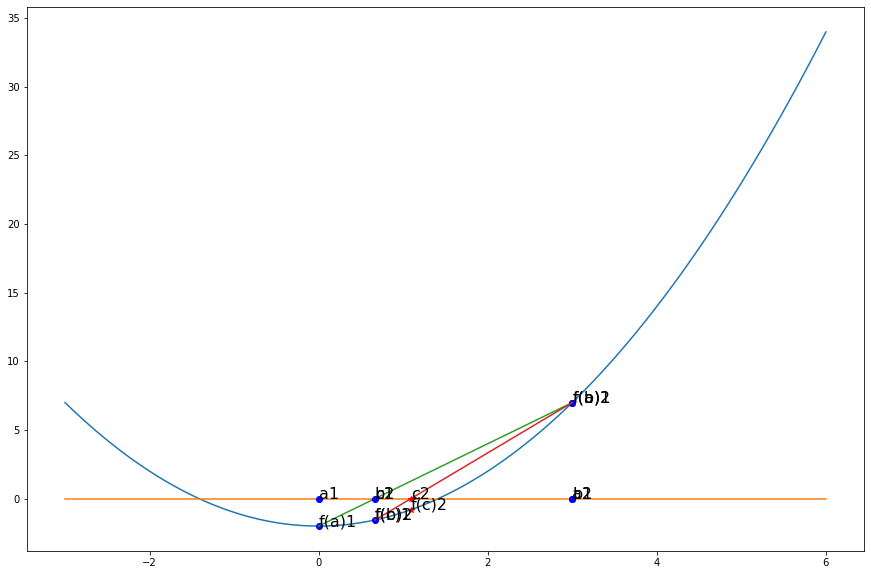

In [22]:
x = secica_viz(0,3,2,10**-5,lambda x: x**2-2)

### $$x_4=x_2-f(x_2)\frac{x_2-x_3}{f(x_2)-f(x_3)}\\f(x_2)=7\\f(x_3)=f(\frac{2}{3})=(\frac{2}{3})^2-2=-\frac{14}{9}\\x_4=3-7\frac{3-\frac{2}{3}}{7+\frac{14}{9}}=3-7\frac{3}{11}=\frac{12}{11}$$

-0.9395866705847193


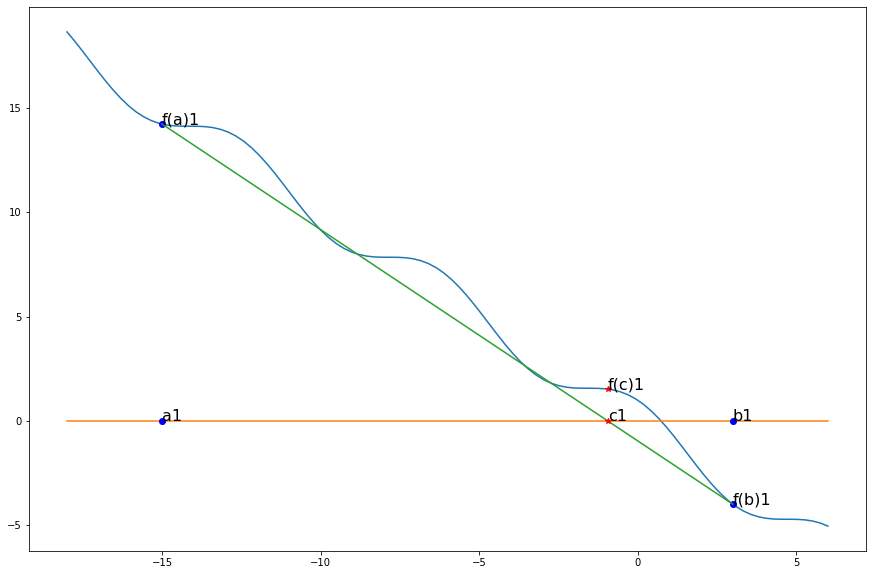

In [23]:
x = secica_viz(-15,3,1,10**-5,lambda x: np.cos(x)-x)
print(x)

#### Pogledati animaciju za metodu sečice sa slajdova.

#### Pišemo kod za metodu sečice.

In [35]:
def secica(a,b,maxIter,tacnost,funkcija):
    print("iter\tx1\t\tx2\t\tx3\t\tf(x3)")
    for i in range(1,maxIter+1):
        fa=funkcija(a)
        fb=funkcija(b)
           
        k=(fb-fa)/(b-a)
        n=fb-k*b
        c=-n/k
        
        fc=funkcija(c)
        
        tmp_str = "%.1f \t %.8f \t %.8f \t %.8f \t %.8f" % (i,a,b,c,fc)
        print(tmp_str)
            
        if np.abs(fc)<tacnost:
            break
            
        a=b
        b=c
    return c

In [36]:
x = secica(-15,3,10,10**-5,lambda x: np.cos(x)-x)
print(x)

iter	x1		x2		x3		f(x3)
1.0 	 -15.00000000 	 3.00000000 	 -0.93958667 	 1.52970843
2.0 	 3.00000000 	 -0.93958667 	 0.15221505 	 0.83622259
3.0 	 -0.93958667 	 0.15221505 	 1.46873690 	 -1.36685456
4.0 	 0.15221505 	 1.46873690 	 0.65192760 	 0.14298816
5.0 	 1.46873690 	 0.65192760 	 0.72928272 	 0.01636983
6.0 	 0.65192760 	 0.72928272 	 0.73928356 	 -0.00033210
7.0 	 0.72928272 	 0.73928356 	 0.73908470 	 0.00000072
0.7390847015697208


In [53]:
x = secica(-15,3,10,10**-5,lambda x: np.cos(x)-x)
print(x)
x = polovljenje(-15,5,30,10**-5,lambda x: np.cos(x)-x)
print(x)

iter	x1		x2		x3		f(x3)
1.0 	 -15.00000000 	 3.00000000 	 -0.93958667 	 1.52970843
2.0 	 3.00000000 	 -0.93958667 	 0.15221505 	 0.83622259
3.0 	 -0.93958667 	 0.15221505 	 1.46873690 	 -1.36685456
4.0 	 0.15221505 	 1.46873690 	 0.65192760 	 0.14298816
5.0 	 1.46873690 	 0.65192760 	 0.72928272 	 0.01636983
6.0 	 0.65192760 	 0.72928272 	 0.73928356 	 -0.00033210
7.0 	 0.72928272 	 0.73928356 	 0.73908470 	 0.00000072
0.7390847015697208
iter	a		b		c		|b-a|
1.0 	 -15.00000000 	 5.00000000 	 -5.00000000 	 20.00000000
2.0 	 -5.00000000 	 5.00000000 	 0.00000000 	 10.00000000
3.0 	 0.00000000 	 5.00000000 	 2.50000000 	 5.00000000
4.0 	 0.00000000 	 2.50000000 	 1.25000000 	 2.50000000
5.0 	 0.00000000 	 1.25000000 	 0.62500000 	 1.25000000
6.0 	 0.62500000 	 1.25000000 	 0.93750000 	 0.62500000
7.0 	 0.62500000 	 0.93750000 	 0.78125000 	 0.31250000
8.0 	 0.62500000 	 0.78125000 	 0.70312500 	 0.15625000
9.0 	 0.70312500 	 0.78125000 	 0.74218750 	 0.07812500
10.0 	 0.70312500 	 0.7421875

## Konvergencija metode sečice

#### Konvergencija metode sečice je super-linearna.
#### To znači da se odnos greške i iteracija menja linearno, tj. $greska = k * itreacija + n$, ali se $k$ kod metode sečice smanjuje kroz iteracije, dakle konvergencija je sve brža. Na primer na početku može da važi $greska = k_1\cdot itreacija + n$, a posle nekoliko iteracija $greska = k_2\cdot itreacija + n$ itd.
#### Kod metode polovljenja vrednost $k$ se ne menja kroz iteracije, odnosno trenutna greška je uvek polovina prethodne greške.

In [54]:
def secica_konvergencija(a,b,maxIter,tacnost,funkcija,ax):
    greske=[]
    for i in range(1,maxIter+1):
        fa=funkcija(a)
        fb=funkcija(b)
           
        k=(fb-fa)/(b-a)
        n=fb-k*b
        c=-n/k
        
        fc=funkcija(c)
      
        if np.abs(fc)<tacnost:
            break
            
        a=b
        b=c
        
        greske.append(np.abs(a-b))
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 10))
    ax.plot(np.arange(1,len(greske)+1),np.log10(greske),linewidth= 2)
    ax.set_xlabel("Iteracije")
    ax.set_ylabel("Greska")
    return ax

<AxesSubplot:xlabel='Iteracije', ylabel='Greska'>

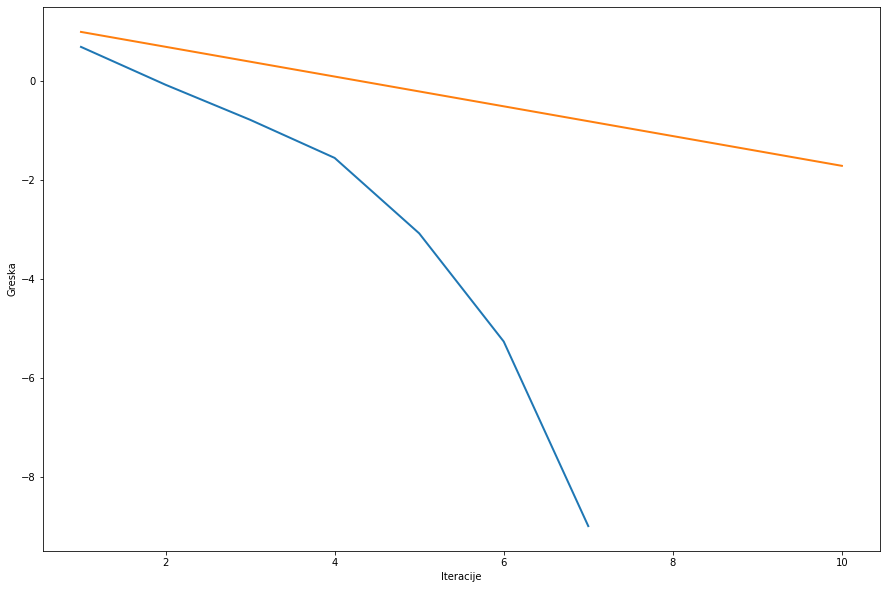

In [55]:
ax_secica = secica_konvergencija(-15,5,10,10**-15,lambda x: np.cos(x)-x,None)
polovljenje_konvergencija(-15,5,10,10**-15,lambda x: np.cos(x)-x,ax_secica)

#### Sečica je otvorena metoda i nema garantovanu konvergenciju. Ona zavisi od odabira početnih vrednosti.

## Metoda regula falsi

#### Regula falsi je modifkacija metode sečice koja kombinuje metodu polovljenja i metodu sečice.
#### Regula falsi zahteva zatvoren iterval u kome se nalazi rešenje kao uslov za pokretanje.
#### Tokom izvršvavanja sečica se povlači uvek kroz tačake između kojih funkcija menja znak.
#### Na ovom predvanju nećemo detaljno obrađivati metodu regula falsi. Kao dodatni neobavezan zadatak, možete napisati kod za metodu regula falsi pomoću kodova sa ovog predavanja.

## Njutnova metoda

#### Njutnova metoda ili metoda tangente koristi istu logiku kao metoda sečice, ali se umesto sečice koristi tangenta.
#### Pretpostavka je da tangenta bolje prati funkciju od sečice pa će samim tim ovaj metod brže konvergirati od metode sečice.
#### Metod je otvoren i zahteva samo jednu početnu tačku. Samim tim konvergencija nije garantovana, ali je kvadratna kada metod konvergira.
#### Njutnova metoda je najbrža metoda koji učimo danas, ali (kao što ćete videti u nastavku) zahteva izvod funkcije koji nije uvek lako ni brzo izračunljiv.

## Algoritam Njutnove metode

#### Krenućemo od jednačine tangente u nekoj tački $x_1$, a $x_2$ ćemo odrediti kao tačku u kojoj ta tangenta seče x-osu.
#### Jednačina tagente u tački $x_i$:
### $$y_i=f(x_i)+f'(x_i)(x-x_i)$$
#### gde je $f'(x_i)$ izvod funkcije $f(x)$ u tački $x_i$.
#### Postavljamo $y_i = 0$, ubacujemo $x_1$ umesto $x_i$, i izražavamo tačku $x_2$ kao tačku $x$ na tangenti za koju važi $y_i = 0$:
### $$0=f(x_1)+f'(x_1)(x_2-x_1)\\f'(x_1)x_2=f(x_1)-f'(x_1)x_1\\x_2=x_1-\frac{f(x_1)}{f'(x_1)}$$

#### Ako sada umesto $x_2$ i $x_1$ redom pišemo $x_{n+1}$ i $x_n$ dobijamo opštu formulu za Njutnovu metodu:
### $$x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$$

#### Primer: Primenićemo sada metodu tangente na funkciju $f(x)=x^2-2$ za početnu vrenosti $x_1=9$. Da li možemo da odaberemo baš bilo koju tačku? Šta bi bilo da smo odabrali $x_1=0$?
### $$x_2=x_1-\frac{f(x_1)}{f'(x_1)}\\f(9)=9^2-2=79\\f'(9)=2\cdot9=18\\x_2=9-\frac{f(9)}{f'(9)}\\x_2=9-\frac{79}{18}=4.6111$$

In [56]:
def tangenta_viz(x1,maxIter,tacnost,funkcija,izvod):
    plot_function([x1-10.,x1+1.],funkcija)
    for i in range(1,maxIter+1):
        fx1=funkcija(x1)
        fizvodx1=izvod(x1)
      
        x2=x1-fx1/fizvodx1
        fx2=funkcija(x2)
        
        draw_point([x1,0],i,'bo',"x1");
        draw_point([x1,funkcija(x1)],i,'bo',"f(x1)");
        draw_point([x2,0],i,'r*',"x2");
        
        tmp_x=np.linspace(x2-3,x1+5,100)
        plt.plot(tmp_x,fx1+fizvodx1*(tmp_x-x1));

        if np.abs(fx2)<tacnost:
            break
        x1=x2

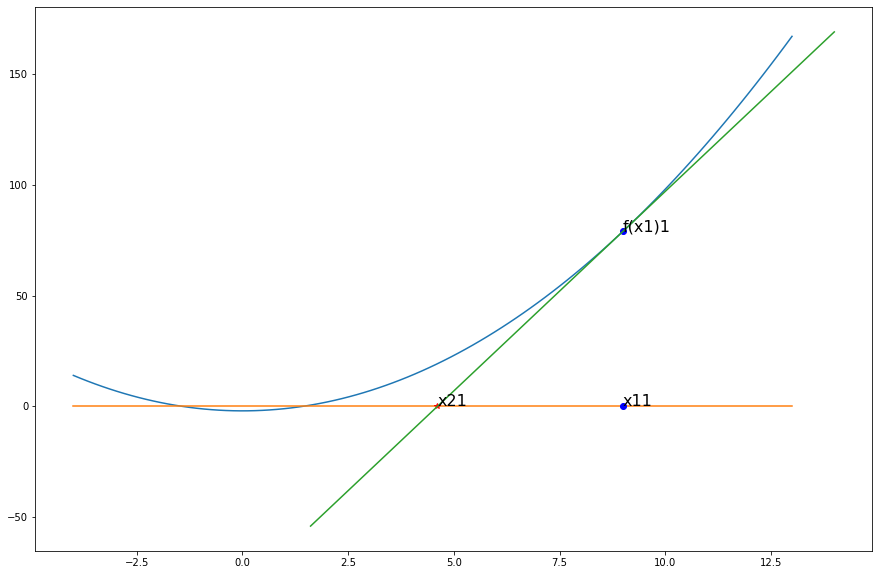

In [57]:
tangenta_viz(9,1,10^-5,lambda x:x**2-2,lambda x:2*x)

### $$x_3=x_2-\frac{f(x_2)}{f'(x_2)}\\f(4.6111)=4.6111^2-2=19.262\\f'(4.6111)=2\cdot4.6111=9.222\\x_3=4.6111-\frac{f(4.6111)}{f'(4.6111)}\\x_2=4.6111-\frac{19.262}{9.222}=2.5224$$

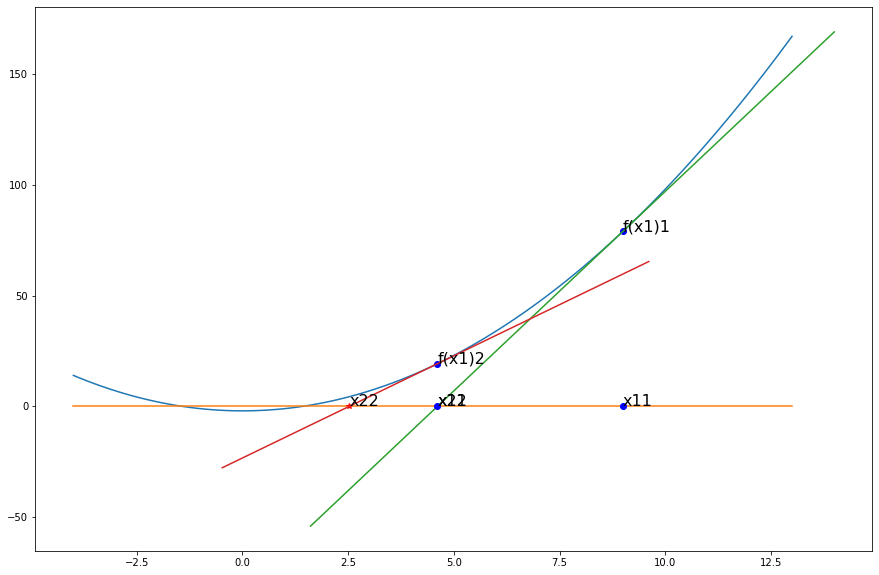

In [58]:
tangenta_viz(9,2,10^-5,lambda x:x**2-2,lambda x:2*x)

#### Pogledati animaciju za metodu tangente sa slajdova.

#### Pišemo kod za metodu tangente.

In [59]:
def tangenta(x1,maxIter,tacnost,funkcija,izvod):
    print("iter\tx1\t\tx2\t\tf(x2)")
    x2=x1
    for i in range(1,maxIter+1):
        fx1=funkcija(x1)
        fizvodx1=izvod(x1)
      
        x2=x1-fx1/fizvodx1
        fx2=funkcija(x2)
        
        tmp_str = "%.1f \t %.8f \t %.8f \t %.8f" % (i,x1,x2,fx2)
        print(tmp_str)
     
        if np.abs(fx2)<tacnost:
            break
        x1=x2
    return x2

In [61]:
x=tangenta(9,10,10^-5,lambda x:x**2-2,lambda x:2*x)
print(x)

iter	x1		x2		f(x2)
1.0 	 9.00000000 	 4.61111111 	 19.26234568
2.0 	 4.61111111 	 2.52242303 	 4.36261792
3.0 	 2.52242303 	 1.65765572 	 0.74782249
4.0 	 1.65765572 	 1.43208943 	 0.05088015
5.0 	 1.43208943 	 1.41432513 	 0.00031557
6.0 	 1.41432513 	 1.41421357 	 0.00000001
7.0 	 1.41421357 	 1.41421356 	 0.00000000
8.0 	 1.41421356 	 1.41421356 	 -0.00000000
9.0 	 1.41421356 	 1.41421356 	 0.00000000
10.0 	 1.41421356 	 1.41421356 	 -0.00000000
1.414213562373095


In [62]:
tangenta(5,20,10**-5,lambda x: np.cos(x)-x,lambda x: -np.sin(x)-1)
secica(-15,5,20,10**-5,lambda x: np.cos(x)-x)
polovljenje(-15,5,10,10**-5,lambda x: np.cos(x)-x)

iter	x1		x2		f(x2)
1.0 	 5.00000000 	 -109.82056070 	 108.82968391
2.0 	 -109.82056070 	 15.96077756 	 -16.92898988
3.0 	 15.96077756 	 -6.61511546 	 7.56053059
4.0 	 -6.61511546 	 4.60009970 	 -4.71215316
5.0 	 4.60009970 	 -743.61972519 	 743.02810852
6.0 	 -743.61972519 	 3090.75839064 	 -3089.91583220
7.0 	 3090.75839064 	 -3606.14007271 	 3607.05787238
8.0 	 -3606.14007271 	 -1024.21822264 	 1025.21648160
9.0 	 -1024.21822264 	 65.25924708 	 -66.01486546
10.0 	 65.25924708 	 25.37140273 	 -24.39974746
11.0 	 25.37140273 	 5.63692972 	 -4.83858544
12.0 	 5.63692972 	 -6.52647233 	 7.49702373
13.0 	 -6.52647233 	 3.34965197 	 -4.32808560
14.0 	 3.34965197 	 -2.10519474 	 1.59587132
15.0 	 -2.10519474 	 9.34091211 	 -10.33739743
16.0 	 9.34091211 	 -0.19747757 	 1.17804216
17.0 	 -0.19747757 	 1.26810728 	 -0.97001919
18.0 	 1.26810728 	 0.77181659 	 -0.05517169
19.0 	 0.77181659 	 0.73931367 	 -0.00038250
20.0 	 0.73931367 	 0.73908514 	 -0.00000002
iter	x1		x2		x3		f(x3)
1.0 	 -15.

0.72265625

#### Metoda tangente divergira za početnu vrednost $x_1=5$. To je zato što je tačka $x_1=5$ skoro tačka prevoja, tj. važi $f'(5)=-sin(5)-1=-0.041$. Što možemo videti i na grafiku.

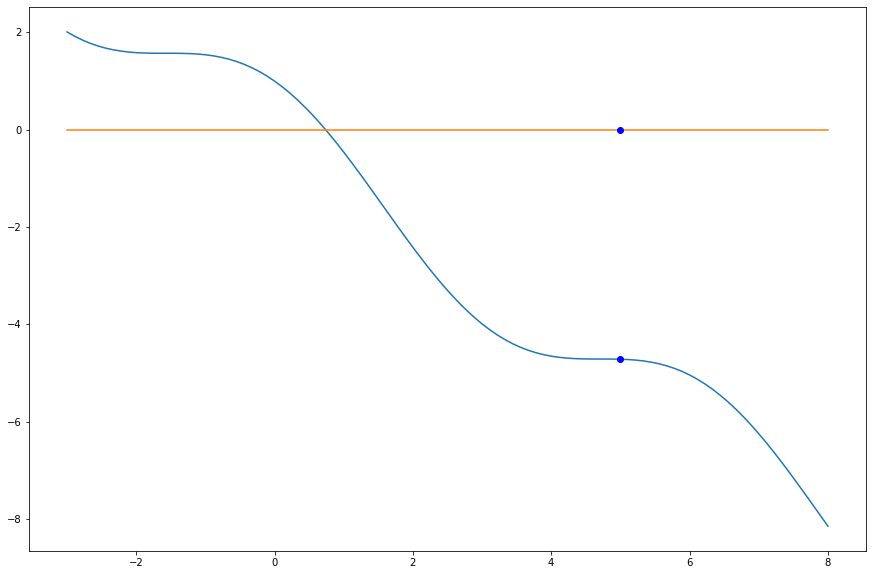

In [64]:
plot_function([0,5],lambda x: np.cos(x)-x)
plt.plot(5,0,'bo')
plt.plot(5,np.cos(5)-5,'bo')

#### Sada menjamo početnu tačku na $x_1=2.5$ i poredimo metode.

In [65]:
tangenta(2.5,20,10**-5,lambda x: np.cos(x)-x,lambda x: -np.sin(x)-1)
secica(-2.5,2.5,20,10**-5,lambda x: np.cos(x)-x)
polovljenje(-2.5,2.5,10,10**-5,lambda x: np.cos(x)-x)

iter	x1		x2		f(x2)
1.0 	 2.50000000 	 0.43481317 	 0.47213558
2.0 	 0.43481317 	 0.76701271 	 -0.04702568
3.0 	 0.76701271 	 0.73925236 	 -0.00027988
4.0 	 0.73925236 	 0.73908514 	 -0.00000001
iter	x1		x2		x3		f(x3)
1.0 	 -2.50000000 	 2.50000000 	 -0.80114362 	 1.49702949
2.0 	 2.50000000 	 -0.80114362 	 0.22881284 	 0.74512352
3.0 	 -0.80114362 	 0.22881284 	 1.24947873 	 -0.93366173
4.0 	 0.22881284 	 1.24947873 	 0.68183216 	 0.09458720
5.0 	 1.24947873 	 0.68183216 	 0.73404919 	 0.00841883
6.0 	 0.68183216 	 0.73404919 	 0.73915090 	 -0.00011007
7.0 	 0.73404919 	 0.73915090 	 0.73908506 	 0.00000012
iter	a		b		c		|b-a|
1.0 	 -2.50000000 	 2.50000000 	 0.00000000 	 5.00000000
2.0 	 0.00000000 	 2.50000000 	 1.25000000 	 2.50000000
3.0 	 0.00000000 	 1.25000000 	 0.62500000 	 1.25000000
4.0 	 0.62500000 	 1.25000000 	 0.93750000 	 0.62500000
5.0 	 0.62500000 	 0.93750000 	 0.78125000 	 0.31250000
6.0 	 0.62500000 	 0.78125000 	 0.70312500 	 0.15625000
7.0 	 0.70312500 	 0.7812500

0.7373046875

#### Vidimo da metoda tangente najbrže (za 4 iteracije) stiže do rešenja.

## Konvergencija Njutnove metode

#### Njutnova metoda konvergira kvadratno, odnosno odnos iteracija i greške je kvadratna funkcija.
#### Kao što smo videli na jednom od prethodnih primera, konvergencija Njutnove metode nije garantovana i zavisi od izbora početnog rešenja.
#### Ako bismo u praksi hteli da što brže garantovano stignemo do tačnog rešenja, jedna od opcija bi bila da znamo bar grubo neki veći zatvoreni interval u kome je rešenje, pa da pokrenemo nekoliko iteracije metode polovljenja, pa onda kad suzimo interval odabremo neko početno rešenje i pokrenemo Njutnovu metodu.

In [67]:
def tangenta_konvergencija(x1,maxIter,tacnost,funkcija,izvod,ax):
    greske=[]
    for i in range(1,maxIter+1):
        fx1=funkcija(x1)
        fizvodx1=izvod(x1)
      
        x2=x1-fx1/fizvodx1
        fx2=funkcija(x2)

        if np.abs(fx2)<tacnost:
            break
        x1=x2
        
        greske.append(np.abs(fx2))
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 10))
    ax.plot(np.arange(1,len(greske)+1),np.log10(greske),linewidth= 2)
    ax.set_xlabel("Iteracije")
    ax.set_ylabel("Greska")
    return ax

<AxesSubplot:xlabel='Iteracije', ylabel='Greska'>

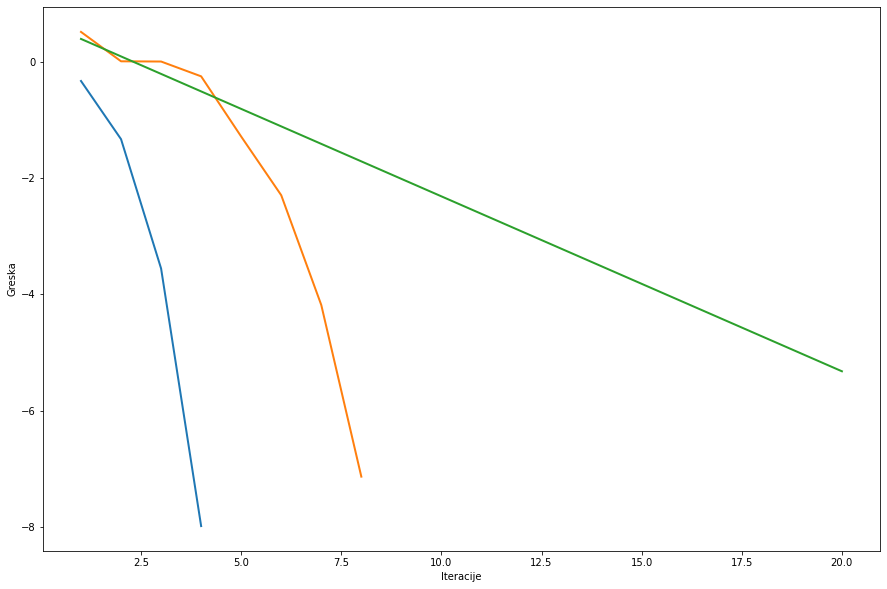

In [68]:
ax = tangenta_konvergencija(2.5,20,10**-15,lambda x: np.cos(x)-x,lambda x: -np.sin(x)-1,None)
ax = secica_konvergencija(-2.5,2.5,20,10**-15,lambda x: np.cos(x)-x,ax)
polovljenje_konvergencija(-2.5,2.5,20,10**-15,lambda x: np.cos(x)-x,ax)